In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df= pd.read_csv(r"C:\Users\kevda\Desktop\ex_github\Data-Science-for-Marketing-Analytics\Data set 05\retail_transactions.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,397884.0,560616.934451,13106.117773,536365.000,549234.00,561893.00,572090.00,581587.00
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75
CustomerID,397884.0,15294.423453,1713.141560,12346.000,13969.00,15159.00,16795.00,18287.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  int64  
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.3+ MB


In [5]:
#convertire invoicedate da object a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
#calcolo della revenue
df['Revenue'] = df['UnitPrice']*df['Quantity']

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2011-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2011-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2011-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


In [8]:
#ragguppo per nfattura facendo la somma della revenue + utilizzo la prima voce della data + codice cliente
op = {'Revenue':'sum',
     'InvoiceDate':'first',
     'CustomerID':'first'
     }
df = df.groupby('InvoiceNo').agg(op)

In [9]:
df.head()

,Revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2010-12-01 08:26:00,17850.0
536366,22.20,2010-12-01 08:28:00,17850.0
536367,278.73,2010-12-01 08:34:00,13047.0
536368,70.05,2010-12-01 08:34:00,13047.0
536369,17.85,2010-12-01 08:35:00,13047.0


In [10]:
#estrapolo l'anno dalla fattura
df['Year'] = df['InvoiceDate'].apply(lambda x:x.year)

In [11]:
df['Days'] = (pd.datetime(year=2010,month=12,day=31) - df['InvoiceDate']).apply(lambda x:x.days)

<ipython-input-11-eb3c98cb9d45>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Days'] = (pd.datetime(year=2010,month=12,day=31) - df['InvoiceDate']).apply(lambda x:x.days)


In [12]:
op1 = {'Revenue':'sum',
      'Days':['min','max','nunique'],
      }
X= df[df['Year']==2010].groupby('CustomerID').agg(op1)
X.head(5)

Revenue Days            
                sum  min max nunique
CustomerID                          
12347.0      711.79   23  23       1
12348.0      892.80   14  14       1
12370.0     1868.02   13  16       2
12377.0     1001.52   10  10       1
12383.0      600.72    8   8       1

In [13]:
X.columns = [''.join(col).strip() for col in X.columns.values]
X.head(5)

,Revenuesum,Daysmin,Daysmax,Daysnunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,13,16,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


In [14]:
X['AOV'] = X['Revenuesum']/X['Daysnunique']

In [15]:
X.head(5)

,Revenuesum,Daysmin,Daysmax,Daysnunique,AOV
CustomerID,,,,,
12347.0,711.79,23,23,1,711.79
12348.0,892.80,14,14,1,892.80
12370.0,1868.02,13,16,2,934.01
12377.0,1001.52,10,10,1,1001.52
12383.0,600.72,8,8,1,600.72


In [16]:
y = df[df['Year']==2011].groupby('CustomerID')['Revenue'].sum()

In [17]:
df_def = pd.concat([X,y],axis=1)
df_def

,Revenuesum,Daysmin,Daysmax,Daysnunique,AOV,Revenue
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40
...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,180.60
18281.0,NaN,NaN,NaN,NaN,NaN,80.82
18282.0,NaN,NaN,NaN,NaN,NaN,178.05


In [18]:
df_def.columns = ['2010 Revenue',
                 'fist_purchase',
                 'last_purchase',
                  'n_purchase',
                 'AOV',
                 '2011 Revenue']
df_def.head(5)

,2010 Revenue,fist_purchase,last_purchase,n_purchase,AOV,2011 Revenue
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [19]:
df_def = df_def[~df_def['2010 Revenue'].isnull()]
df_def = df_def[~df_def['2011 Revenue'].isnull()]

In [21]:
df_def = df_def[df_def['2011 Revenue']<((df_def['2011 Revenue'].median())+df_def['2011 Revenue'].std()*3)]
df_def = df_def[df_def['2010 Revenue']<((df_def['2010 Revenue'].median())+df_def['2010 Revenue'].std()*3)]

In [22]:
df_def.to_csv('revenue.csv')
df_def.head(5)

,2010 Revenue,fist_purchase,last_purchase,n_purchase,AOV,2011 Revenue
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,13.0,16.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


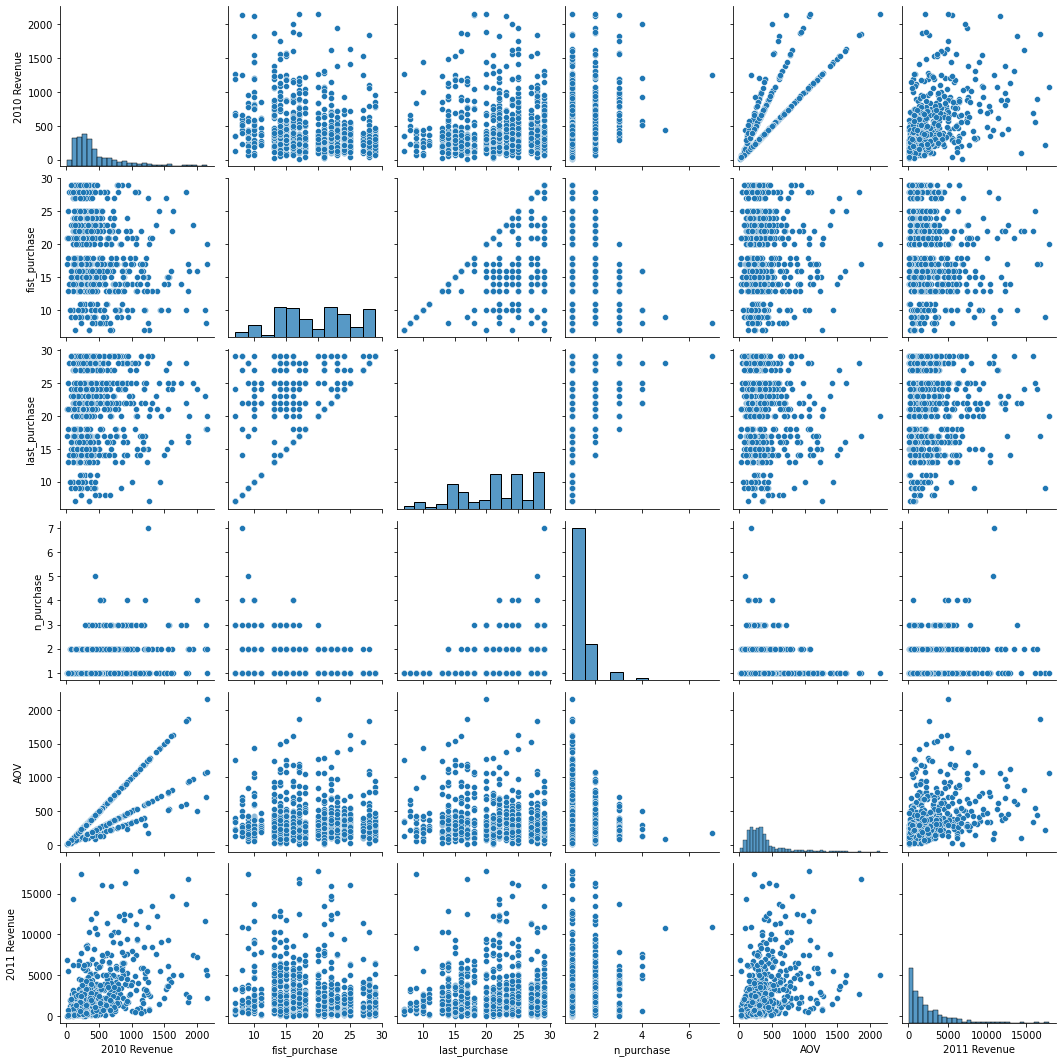

In [23]:
sns.pairplot(df_def)

In [24]:
df_def.corr()

,2010 Revenue,fist_purchase,last_purchase,n_purchase,AOV,2011 Revenue
2010 Revenue,1.000000,-0.229458,0.057854,0.413169,0.817956,0.489723
fist_purchase,-0.229458,1.000000,0.668619,-0.385836,-0.043191,-0.159742
last_purchase,0.057854,0.668619,1.000000,0.314049,-0.115542,0.010526
n_purchase,0.413169,-0.385836,0.314049,1.000000,-0.081163,0.270015
AOV,0.817956,-0.043191,-0.115542,-0.081163,1.000000,0.369001
2011 Revenue,0.489723,-0.159742,0.010526,0.270015,0.369001,1.000000


In [25]:
X1= df_def.drop('2011 Revenue',axis=1)
y1= df_def['2011 Revenue']

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, random_state=100)

In [27]:
model= LinearRegression()
model.fit(X1_train,y1_train)

LinearRegression()

In [28]:
print(model.coef_)
print('--------------------------')
print(model.intercept_)

[   2.22776222   15.37390417  -64.56913038 1041.54661439    1.71101034]
--------------------------
691.013194281659


In [29]:
new_customer = pd.DataFrame({'2010 Revenue':[1000],
                            'fist_purchase':[50],
                            'last_purchase':[7],
                            'n_purchase':[3],
                            'AOV':[500]})
model.predict(new_customer)

array([7215.63172276])

In [ ]:
##  _|m/   ##